In [1]:
import sys

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def generate_graph(n=5, max_weight=10):
    g = nx.Graph()
    nodes = range(n)
    g.add_nodes_from(nodes)
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            edges.append((i, j, random.randint(1, max_weight)))
    g.add_weighted_edges_from(edges)
    return g

In [3]:
def draw(graph):
    print(graph)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, edge_color="red")
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.show()

In [4]:
def find_isolated_nodes(graph):
    isolated_nodes = []
    for node in graph.nodes():
        if not list(graph.neighbors(node)):
            isolated_nodes.append(node)
    return isolated_nodes

In [5]:
def add_edge(new_graph, edge):
    new_graph.add_weighted_edges_from([(edge[0], edge[1], edge[2]['weight'])])
    return new_graph

In [6]:
def min_weight_edge(graph):
    min_weight = sys.maxsize
    min_weight_edge = None
    for u, v, data in graph.edges(data=True):
        if 'weight' in data and data['weight'] < min_weight:
            min_weight = data['weight']
            min_weight_edge = (u, v, data)
    return min_weight_edge

def max_weight_edge(graph):
    max_weight = -float('inf')
    max_weight_edge = None
    for u, v, data in graph.edges(data=True):
        if 'weight' in data and data['weight'] > max_weight:
            max_weight = data['weight']
            max_weight_edge = (u, v, data)
    return max_weight_edge

In [7]:
def shortest_path(graph, clusters):
    new_graph = nx.Graph()
    new_graph.add_nodes_from(graph.nodes)
    draw(new_graph)
    min_edge = min_weight_edge(graph)
    new_graph = add_edge(new_graph, min_edge)
    draw(new_graph)
    joined_nodes = [min_edge[0], min_edge[1]]
    isolated_nodes = find_isolated_nodes(new_graph)
    while len(isolated_nodes) > 0:
        min_weight = sys.maxsize
        min_edge = None
        for isolated in isolated_nodes:
            for joined in joined_nodes:
                data = graph.get_edge_data(isolated, joined)
                weight = data['weight']
                if weight < min_weight:
                    min_weight = weight
                    min_edge = (isolated, joined, data)
        if min_edge is None:
            return
        new_graph = add_edge(new_graph, min_edge)
        joined_nodes.append(min_edge[0])
        isolated_nodes.remove(min_edge[0])
        draw(new_graph)
    for i in range(clusters - 1):
        max_edge = max_weight_edge(new_graph)
        new_graph.remove_edge(max_edge[0], max_edge[1])
        draw(new_graph)

Graph with 15 nodes and 105 edges


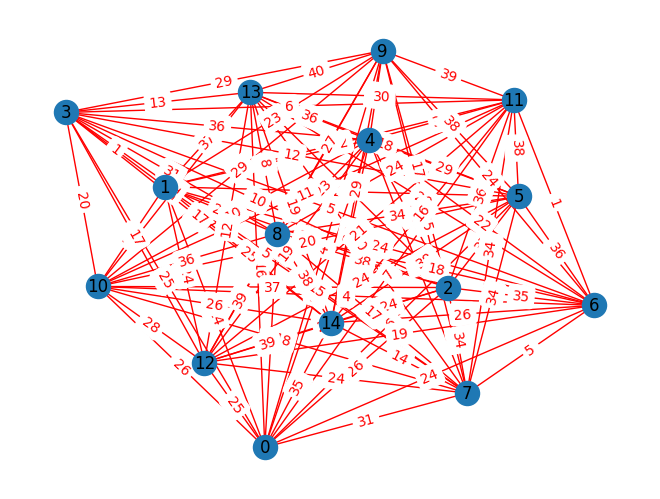

Graph with 15 nodes and 0 edges


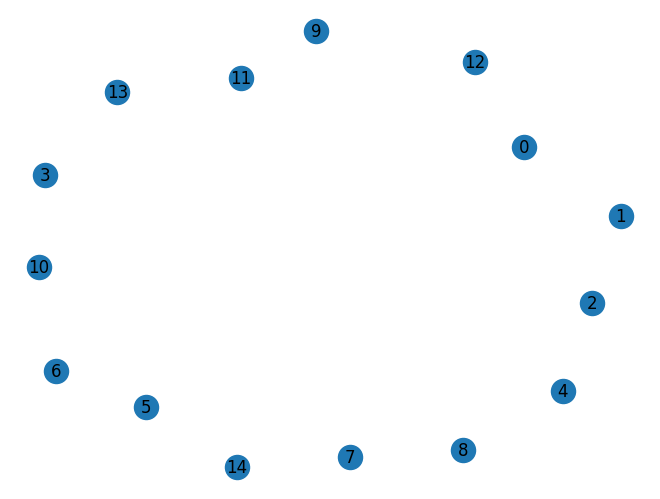

Graph with 15 nodes and 1 edges


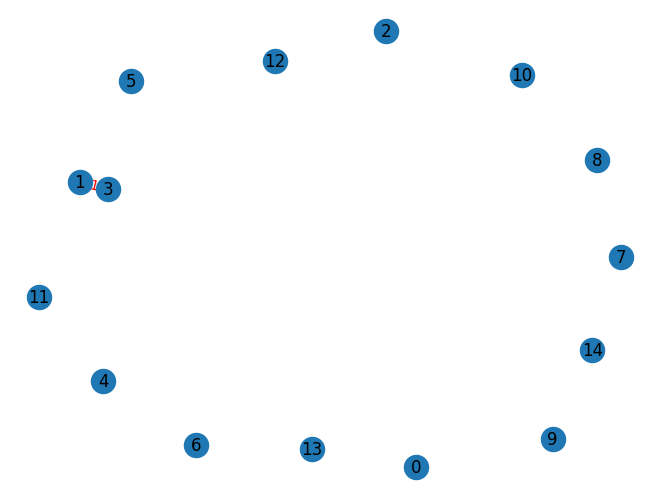

Graph with 15 nodes and 2 edges


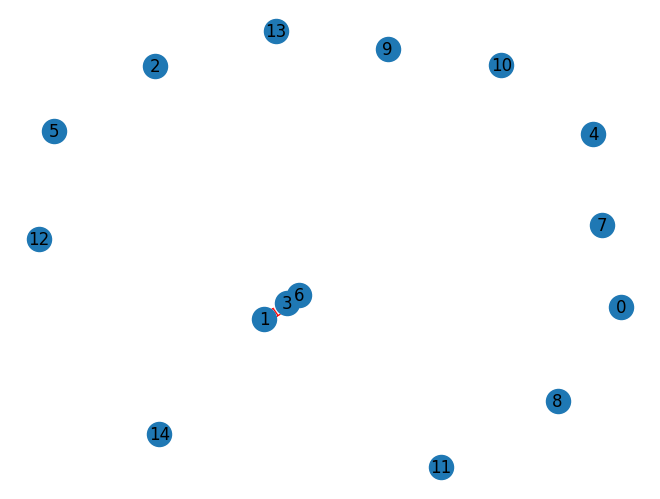

Graph with 15 nodes and 3 edges


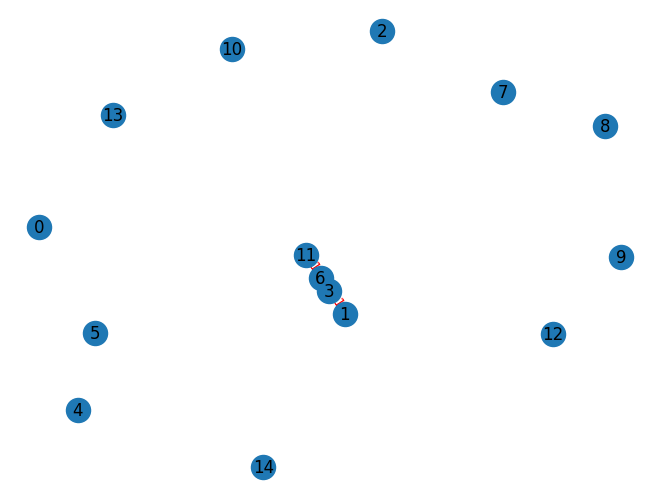

Graph with 15 nodes and 4 edges


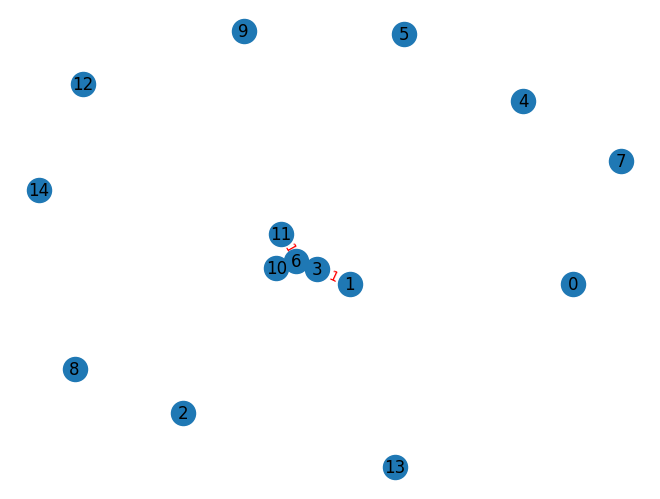

Graph with 15 nodes and 5 edges


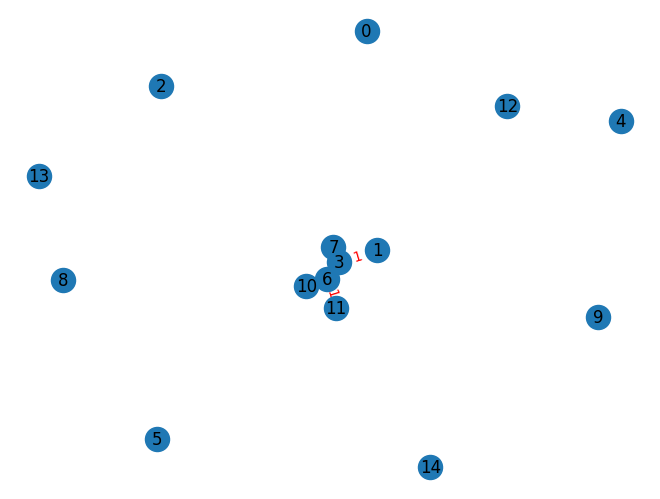

Graph with 15 nodes and 6 edges


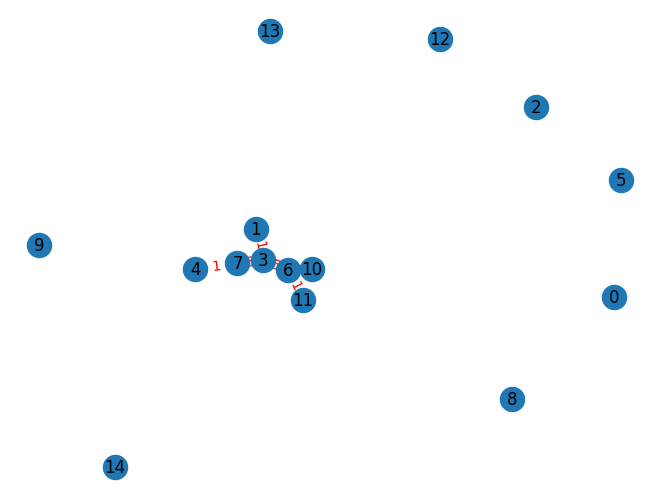

Graph with 15 nodes and 7 edges


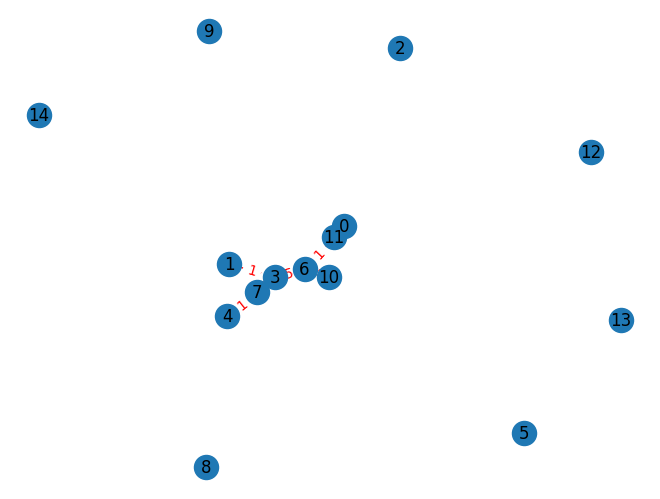

Graph with 15 nodes and 8 edges


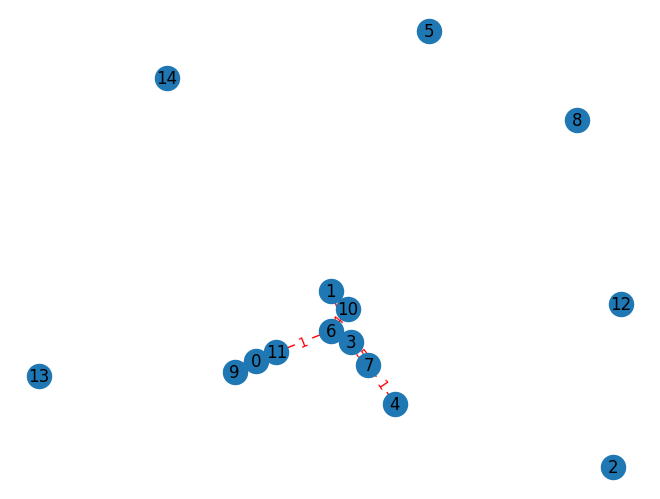

Graph with 15 nodes and 9 edges


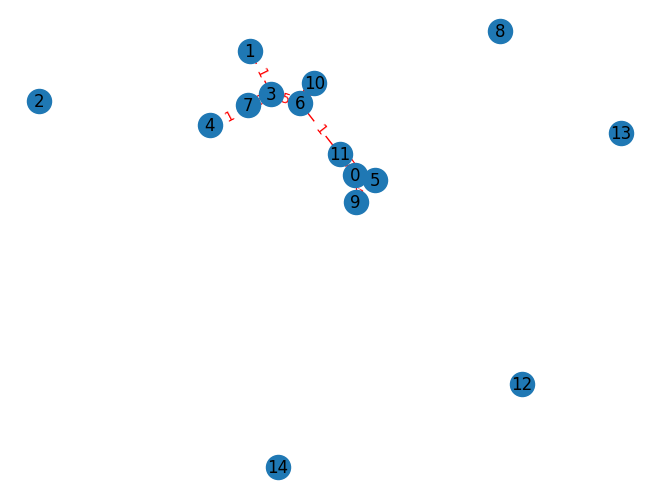

Graph with 15 nodes and 10 edges


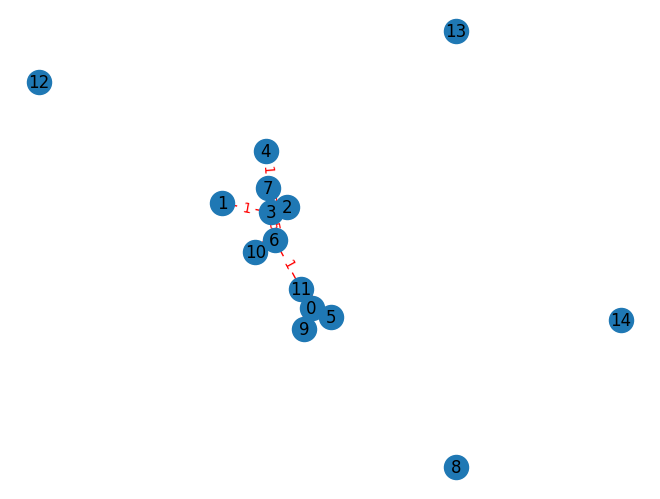

Graph with 15 nodes and 11 edges


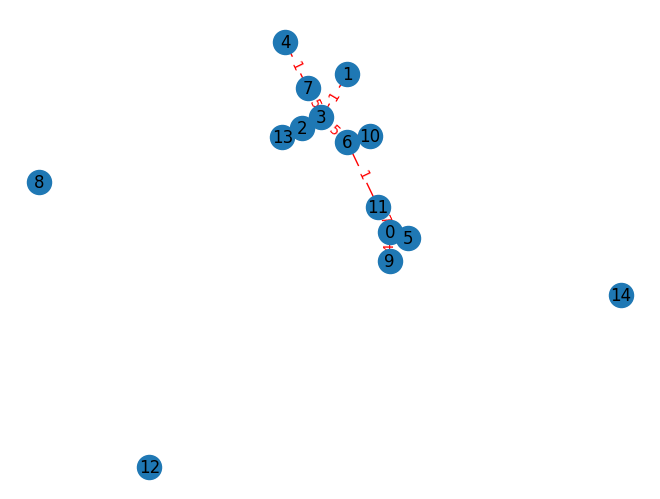

Graph with 15 nodes and 12 edges


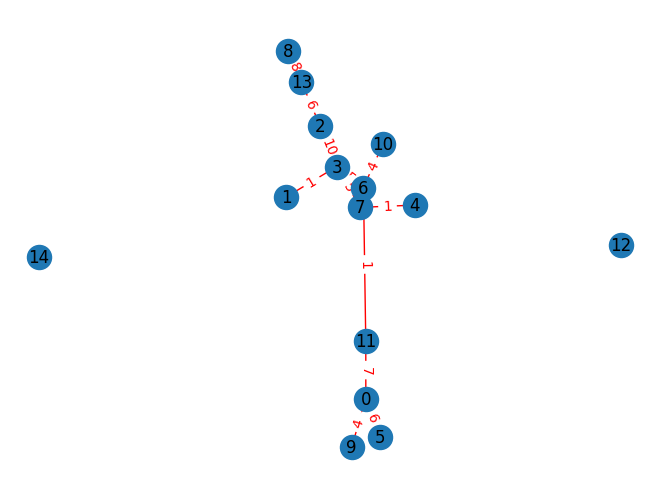

Graph with 15 nodes and 13 edges


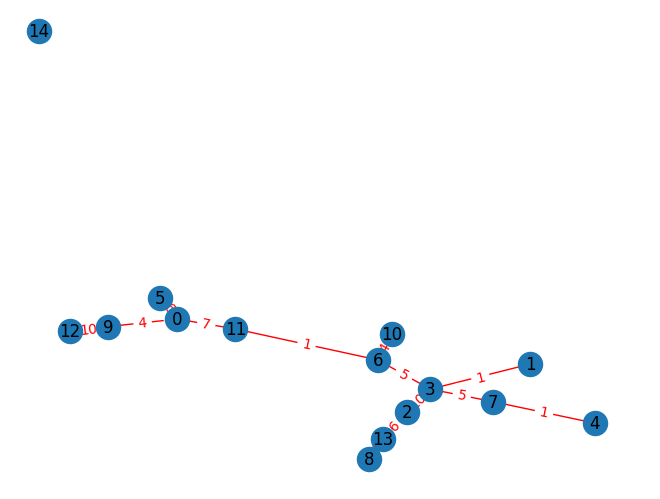

Graph with 15 nodes and 14 edges


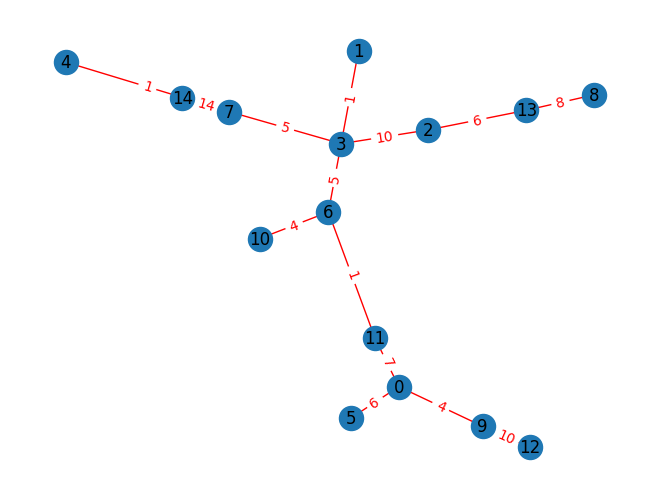

Graph with 15 nodes and 13 edges


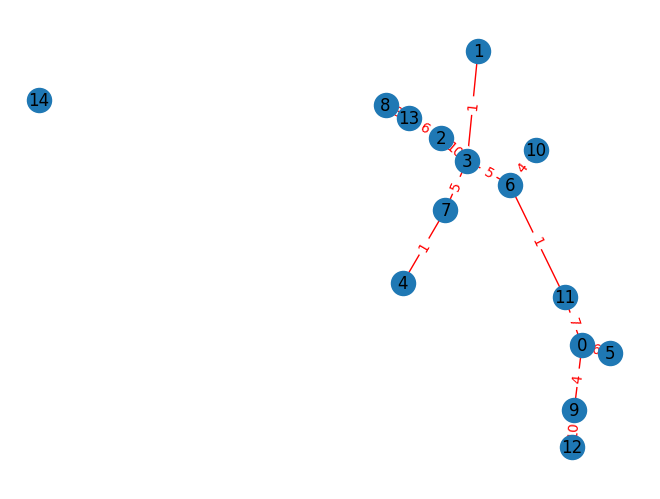

Graph with 15 nodes and 12 edges


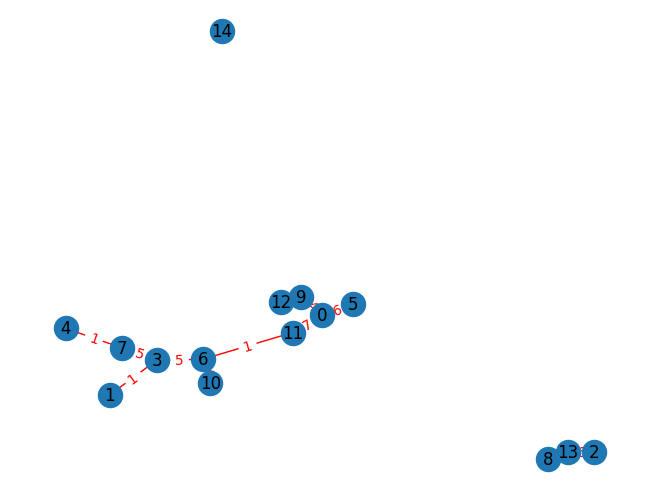

Graph with 15 nodes and 11 edges


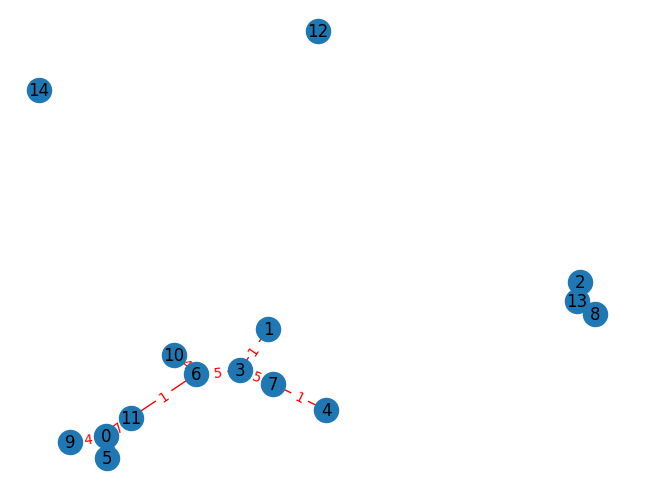

In [8]:
graph = generate_graph(15, 40)
draw(graph)
cluster_count = 4
shortest_path(graph, cluster_count)